<h1 align="center"> Image Compression using SVD </h1>

#### Install required modules

In [ ]:
!pip install numpy matplotlib opencv-python

#### Import required libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.spatial.distance import euclidean

### Image reader method

In [2]:
def read_image(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

### Read the image file

In [5]:
path = "../images/peppers.jpg"
image = read_image(path)

### Showing the original image

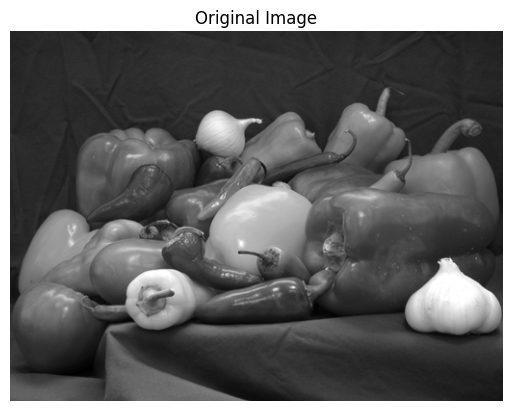

In [6]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("Original Image")
plt.show()

### Convert the image to a matrix

In [10]:
A = image

### Print the matrix shape

In [11]:
print(A.shape)

(384, 512)


### Implementing SVD method

In [12]:
U, Sigma, VT = np.linalg.svd(A)
S = np.zeros(A.shape)
np.fill_diagonal(S, Sigma)

### Print the U, S and V.T shape

In [13]:
print(f"dim(U): {U.shape}")
print(f"dim(S): {S.shape}")
print(f"dim(VT): {VT.shape}")

dim(U): (384, 384)
dim(S): (384, 512)
dim(VT): (512, 512)


### Singular Values and Elbow Method

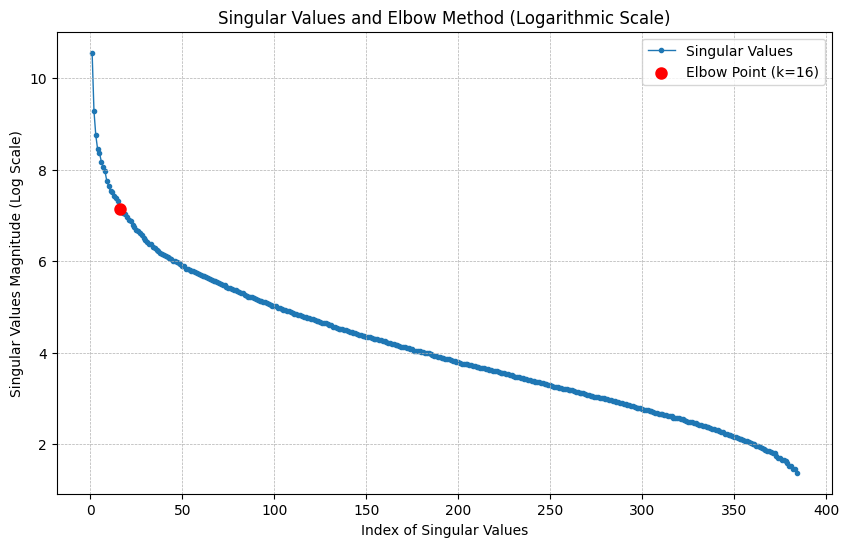

The best number of components (k) by Elbow Method: 16
The distance between these two singular values is 355.292506314221


In [14]:
x = np.arange(1, len(Sigma) + 1)
y = np.log(Sigma)

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker=".", label="Singular Values", linewidth=1, zorder=1)
plt.xlabel("Index of Singular Values")
plt.ylabel("Singular Values Magnitude (Log Scale)")
plt.title("Singular Values and Elbow Method (Logarithmic Scale)")
plt.grid(which="both", linestyle="--", linewidth=0.5)

# Elbow Method
p1 = np.array([x[0], Sigma[0]])
p2 = np.array([x[-1], Sigma[-1]])

distances = []

for i in range(len(Sigma)-1):
    p = np.array([x[i], Sigma[i]])
    d = np.abs(np.cross(p2 - p1, p1 - p)) / euclidean(p1, p2)
    distances.append(d)

elbow_index = np.argmax(distances)
elbow_value = np.max(distances)

plt.scatter(x[elbow_index], y[elbow_index],
            marker="o",
            color='red',
            label=f"Elbow Point (k={elbow_index + 1})",
            linewidths=3,
            zorder=2)

plt.legend()
plt.show()

print(f"The best number of components (k) by Elbow Method: {elbow_index + 1}")
print(f"The distance between these two singular values is {elbow_value}")

### Reconstructing the primary matrix

In [15]:
k = elbow_index + 1

B = U @ S @ VT
C = U[:, :k] @ np.diag(Sigma[:k]) @ VT[:k, :]

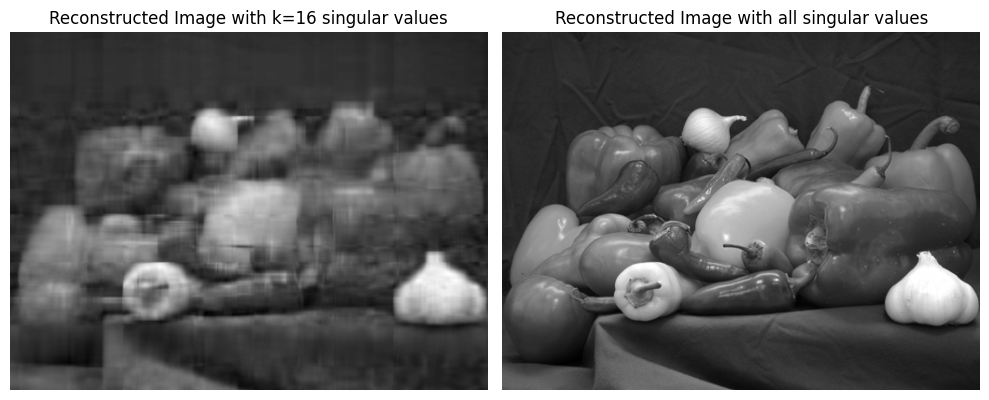

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))


axes[0].imshow(C, cmap='gray')

axes[0].axis('off')

axes[0].set_title(f"Reconstructed Image with k={k} singular values")

axes[1].imshow(B, cmap='gray')
axes[1].axis('off')
axes[1].set_title("Reconstructed Image with all singular values")


plt.tight_layout()
plt.show()

In [17]:
np.linalg.norm(A-C, ord=2)

1230.4583692229598

### Showing the extracted images as result

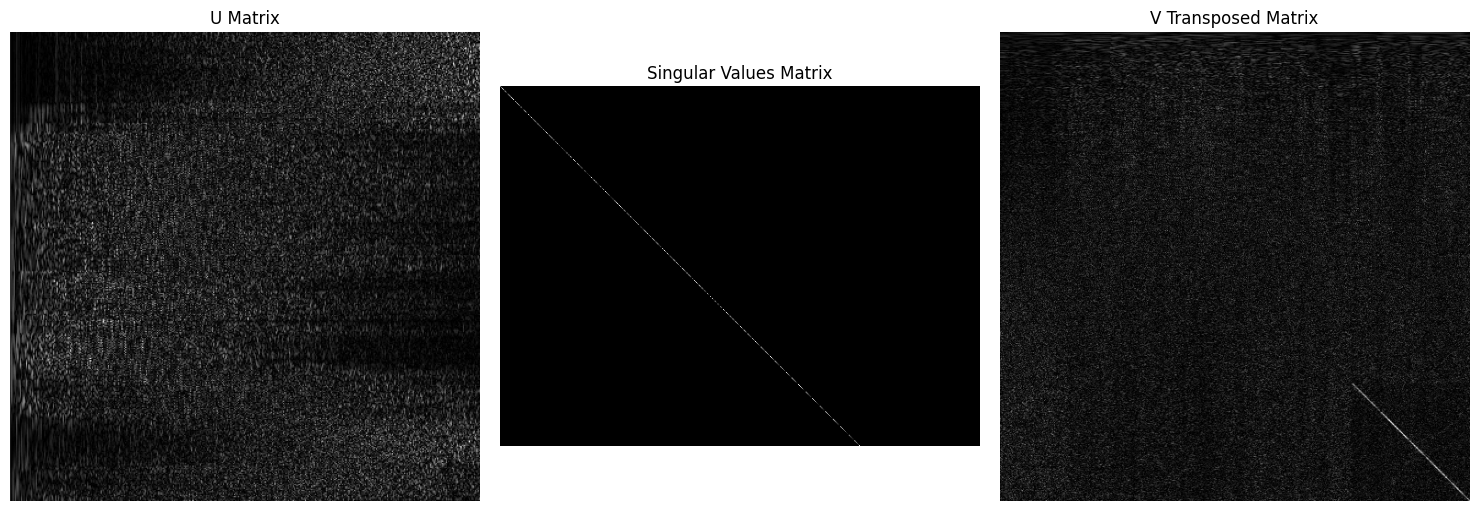

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(abs(U * 255).astype("uint8"), cmap='gray')
axes[0].axis('off')
axes[0].set_title('U Matrix')

axes[1].imshow(abs(S * 255).astype("uint8"), cmap='gray')
axes[1].axis('off')
axes[1].set_title('Singular Values Matrix')

axes[2].imshow(abs(VT * 255).astype("uint8"), cmap='gray')
axes[2].axis('off')
axes[2].set_title('V Transposed Matrix')

plt.tight_layout()
plt.show()

### More matrix information about this image

In [19]:
rank = np.linalg.matrix_rank(A)
print(f"Image matrix rank is {rank}.")

Image matrix rank is 384.
